## LINEAR REGRESSION--MEDICAL INSURANCE

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split,GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression,Ridge, Lasso

from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

from scipy.stats import skew,zscore

import warnings
warnings.filterwarnings("ignore")

# PROBLEM STATEMENT :-

In [2]:
df = pd.read_csv("medical_insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
# 1338 rows × 7 columns

## EXPLORATORY DATA ANALYSIS AND FEATURE ENGINEERING :-

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.columns    # 7 features

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [6]:
df.isna().sum()   # no NAN values

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


<AxesSubplot:>

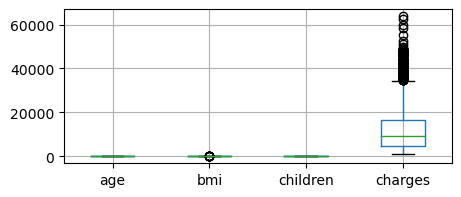

In [8]:
plt.figure(figsize=(5,2))
df.boxplot()

In [9]:
df.select_dtypes(include=['object']).info()  #  # need to convert all features in numerical type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   sex     1338 non-null   object
 1   smoker  1338 non-null   object
 2   region  1338 non-null   object
dtypes: object(3)
memory usage: 31.5+ KB


### 1. sex:-

In [10]:
df["sex"]  

0       female
1         male
2         male
3         male
4         male
         ...  
1333      male
1334    female
1335    female
1336    female
1337    female
Name: sex, Length: 1338, dtype: object

In [11]:
df["sex"].unique()   # no NAN valuse

array(['female', 'male'], dtype=object)

In [12]:
df["sex"].value_counts().to_dict()

{'male': 676, 'female': 662}

In [13]:
# step of Feature engineering---> labelled encoding choose

df["sex"].replace({'male': 0, 'female': 1}, inplace=True)  

In [14]:
sex_select = {'male': 0, 'female': 1}

## 2.smoker 

In [15]:
df['smoker']

0       yes
1        no
2        no
3        no
4        no
       ... 
1333     no
1334     no
1335     no
1336     no
1337    yes
Name: smoker, Length: 1338, dtype: object

In [16]:
df['smoker'].unique()   # No NAN value here

array(['yes', 'no'], dtype=object)

In [17]:
df['smoker'].value_counts().to_dict()

{'no': 1064, 'yes': 274}

In [18]:
# step of Feature engineering---> labelled encoding choose

df["smoker"].replace({'no': 0, 'yes': 1}, inplace=True)

In [19]:
smoker_select = {'no': 0, 'yes': 1}

In [135]:
# df.info()

## 3.region

In [21]:
df['region']

0       southwest
1       southeast
2       southeast
3       northwest
4       northwest
          ...    
1333    northwest
1334    northeast
1335    southeast
1336    southwest
1337    northwest
Name: region, Length: 1338, dtype: object

In [22]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [23]:
df['region'].value_counts().to_dict()

{'southeast': 364, 'southwest': 325, 'northwest': 325, 'northeast': 324}

In [24]:
# Feature engineering---> one hot encoding

df = pd.get_dummies(df,columns=["region"])
# df          #  1338 rows × 10 columns...intially 7 columns

In [25]:
# df.info()

## 4.age

In [26]:
df['age']

0       19
1       18
2       28
3       33
4       32
        ..
1333    50
1334    18
1335    18
1336    21
1337    61
Name: age, Length: 1338, dtype: int64

In [27]:
df['age'].unique()

array([19, 18, 28, 33, 32, 31, 46, 37, 60, 25, 62, 23, 56, 27, 52, 30, 34,
       59, 63, 55, 22, 26, 35, 24, 41, 38, 36, 21, 48, 40, 58, 53, 43, 64,
       20, 61, 44, 57, 29, 45, 54, 49, 47, 51, 42, 50, 39], dtype=int64)

In [28]:
# df['age'].value_counts()
df['age'].nunique()   

47

In [29]:
df['age'].isna().sum()  # no NAN value present

0

<AxesSubplot:xlabel='age'>

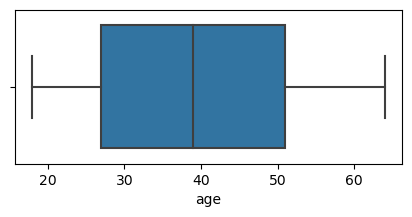

In [30]:
# check outliers

plt.figure(figsize=(5,2))
sns.boxplot(x = df['age'])   # no outlirs found here

## 5.bmi

In [31]:
df['bmi']

0       27.900
1       33.770
2       33.000
3       22.705
4       28.880
         ...  
1333    30.970
1334    31.920
1335    36.850
1336    25.800
1337    29.070
Name: bmi, Length: 1338, dtype: float64

In [32]:
# df['bmi'].unique()
df['bmi'].nunique()    # 548 unique values presnt

548

In [33]:
df['bmi'].value_counts()

32.300    13
28.310     9
30.495     8
30.875     8
31.350     8
          ..
46.200     1
23.800     1
44.770     1
32.120     1
30.970     1
Name: bmi, Length: 548, dtype: int64

In [34]:
df['bmi'].isna().sum()   # No NAN values 

0

<AxesSubplot:xlabel='bmi'>

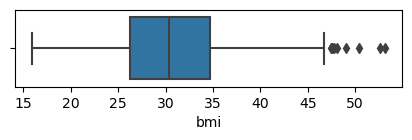

In [35]:
# check outliers

plt.figure(figsize=(5,1))
sns.boxplot(x = df['bmi'])    # Outlires are detected

In [36]:
# Feature Engineering-->need to impute that outlires

q1 = df['bmi'].quantile(0.25)
q2 = df['bmi'].quantile(0.50)
q3 = df['bmi'].quantile(0.75)

iqr = q3 - q1

upper_tail = q3 + 1.5 * iqr
lower_tail = q1 - 1.5 * iqr

print("upper_tail :", upper_tail)
print("lower_tail :", lower_tail)

upper_tail : 47.290000000000006
lower_tail : 13.7


In [37]:
df[['bmi']].loc[df['bmi'] > upper_tail]  # outlirs above upper tail

,bmi
116,49.06
286,48.07
401,47.52
543,47.41
847,50.38
860,47.60
1047,52.58
1088,47.74
1317,53.13


In [38]:
df[['bmi']].loc[df['bmi'] < lower_tail]   # outlirs below lower tail

,bmi


In [39]:
median_choice = df['bmi'].loc[(df['bmi'] <= upper_tail)].median()
median_choice

30.3

In [40]:
mean_choice = df['bmi'].loc[(df['bmi'] <= upper_tail)].mean()
mean_choice

30.53734762979683

In [41]:
upper_tail

47.290000000000006

In [42]:
df.loc[(df['bmi'] > upper_tail), 'bmi'] = 47.290000000000006  # impute with uppertail

In [43]:
df.loc[(df['bmi'] > upper_tail), 'bmi']  # again check

Series([], Name: bmi, dtype: float64)

<AxesSubplot:xlabel='bmi'>

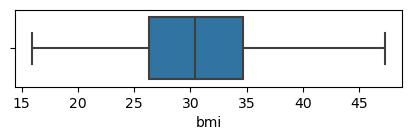

In [44]:
plt.figure(figsize=(5,1))
sns.boxplot(x = df['bmi'])   # again check

In [45]:
# df.info()

## 6.children

In [46]:
df['children']

0       0
1       1
2       3
3       0
4       0
       ..
1333    3
1334    0
1335    0
1336    0
1337    0
Name: children, Length: 1338, dtype: int64

In [47]:
df['children'].unique()   # no NAN value present

array([0, 1, 3, 2, 5, 4], dtype=int64)

In [48]:
df['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

<AxesSubplot:xlabel='children'>

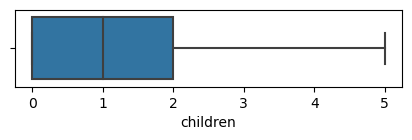

In [49]:
# check outliers

plt.figure(figsize=(5,1))
sns.boxplot(x = df['children']) # No outlirs detected

## 7.charges

In [50]:
df['charges']

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [51]:
# df['charges'].isna().sum()

In [52]:
# df['charges'].value_counts()

<AxesSubplot:xlabel='charges'>

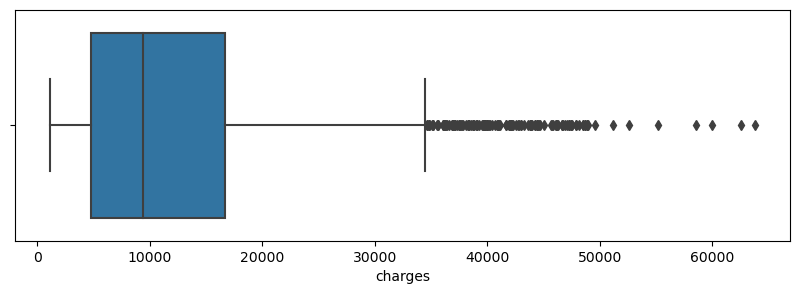

In [53]:
plt.figure(figsize=(10,3))
sns.boxplot(x = df['charges'])

In [54]:
q1 = df['charges'].quantile(0.25)
q2 = df['charges'].quantile(0.50)
q3 = df['charges'].quantile(0.75)

iqr = q3 - q1

upper_tail = q3 + 1.5 * iqr
lower_tail = q1 - 1.5 * iqr


print("upper_tail :", upper_tail)
print("lower_tail :", lower_tail)

upper_tail : 34489.350562499996
lower_tail : -13109.1508975


In [55]:
df[['charges']].loc[df['charges'] > upper_tail] 

,charges
14,39611.75770
19,36837.46700
23,37701.87680
29,38711.00000
30,35585.57600
...,...
1300,62592.87309
1301,46718.16325
1303,37829.72420
1313,36397.57600


In [56]:
df['charges'].loc[(df['charges'] <= upper_tail) & 
                            (df['charges'] >= lower_tail)].mean() 

9927.753402125936

In [57]:
df['charges'].loc[(df['charges'] <= upper_tail) & 
                            (df['charges'] >= lower_tail)].median() 

8410.04685

In [58]:
upper_tail

34489.350562499996

In [59]:
df.loc[(df['charges'] > upper_tail), 'charges'] = upper_tail   



In [60]:
df.select_dtypes(include=['object']).info()   # no object type columns are present

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Empty DataFrame

In [61]:
df.head().T

,0,1,2,3,4
age,19.000,18.0000,28.000,33.00000,32.0000
sex,1.000,0.0000,0.000,0.00000,0.0000
bmi,27.900,33.7700,33.000,22.70500,28.8800
children,0.000,1.0000,3.000,0.00000,0.0000
smoker,1.000,0.0000,0.000,0.00000,0.0000
charges,16884.924,1725.5523,4449.462,21984.47061,3866.8552
region_northeast,0.000,0.0000,0.000,0.00000,0.0000
region_northwest,0.000,0.0000,0.000,1.00000,1.0000
region_southeast,0.000,1.0000,1.000,0.00000,0.0000
region_southwest,1.000,0.0000,0.000,0.00000,0.0000


# FEATURE SELECTION

## 1. LINIARITY

In [62]:
df.corr()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
age,1.000000,0.020856,0.111930,0.042469,-0.025019,0.313394,0.002475,-0.000407,-0.011642,0.010016
sex,0.020856,1.000000,-0.044802,-0.017163,-0.076185,-0.052322,0.002425,0.011156,-0.017117,0.004184
bmi,0.111930,-0.044802,1.000000,0.013700,0.003146,0.160996,-0.138075,-0.135672,0.268556,-0.005087
children,0.042469,-0.017163,0.013700,1.000000,0.007673,0.073074,-0.022808,0.024806,-0.023066,0.021914
smoker,-0.025019,-0.076185,0.003146,0.007673,1.000000,0.785958,0.002811,-0.036945,0.068498,-0.036945
charges,0.313394,-0.052322,0.160996,0.073074,0.785958,1.000000,0.017236,-0.035204,0.059990,-0.044267
region_northeast,0.002475,0.002425,-0.138075,-0.022808,0.002811,0.017236,1.000000,-0.320177,-0.345561,-0.320177
region_northwest,-0.000407,0.011156,-0.135672,0.024806,-0.036945,-0.035204,-0.320177,1.000000,-0.346265,-0.320829
region_southeast,-0.011642,-0.017117,0.268556,-0.023066,0.068498,0.059990,-0.345561,-0.346265,1.000000,-0.346265
region_southwest,0.010016,0.004184,-0.005087,0.021914,-0.036945,-0.044267,-0.320177,-0.320829,-0.346265,1.000000


<AxesSubplot:>

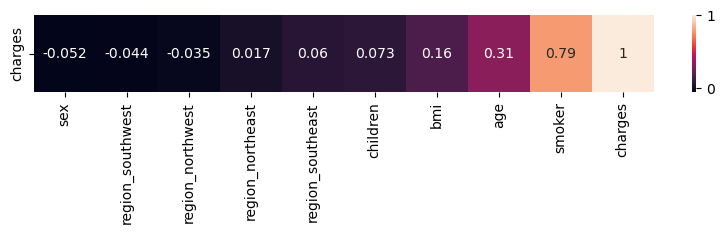

In [63]:
charges_linearty = df.drop('charges', axis= 1)   
charges_column  = df['charges']
charges_linearty.insert(9,'charges',charges_column,allow_duplicates=True)  
charges_linearty

corr_with_charges = charges_linearty.corr().tail(1).sort_values("charges", axis=1) # linearity with dependent variable
plt.figure(figsize=(10,1))
sns.heatmap(corr_with_charges, annot= True)

# 2.NO MULTICOLINEARITY:

<AxesSubplot:>

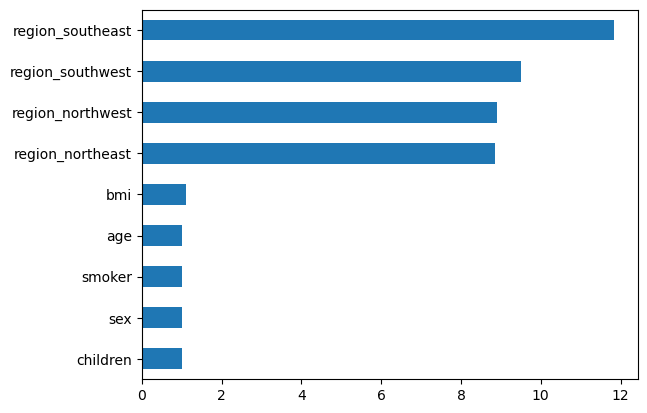

In [64]:
df1 = df.drop("charges", axis=1)

vif_list = []
for i in range(df1.shape[1]):
    
    vif = variance_inflation_factor(df1,i)
    vif_list.append(vif)
    
s1 = pd.Series(vif_list, index=df1.columns)
s1.sort_values().plot(kind = "barh")

# MODEL BUILDING:-

In [65]:
x = df.drop("charges", axis=1)     
y = df['charges']  

In [66]:
# x
# y

In [67]:
# Train Test Split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25, random_state=10)

In [68]:
# x_train    # 1003 rows × 9 columns

In [69]:
# x_test     # 335 rows × 9 columns

In [70]:
# y_train    # 1003 rows

In [71]:
# y_test     # 335

In [72]:
model = LinearRegression()    # creates an instance of a linear regression model 

model.fit(x_train, y_train)   # fits the linear regression model to the training data

LinearRegression()

# Model Evaluation

## Training Data

In [73]:
y_pred_train = model.predict(x_train)
# y_pred_train     # predictions for the training data

In [74]:
mse = mean_squared_error(y_train, y_pred_train)
print("MSE :",mse)

rmse = np.sqrt(mse)
print("RMSE :",rmse)

mae = mean_absolute_error(y_train, y_pred_train)
print("MAE :",mae)

Training_Accuracy_r2 = r2_score(y_train, y_pred_train)
print("Training Accuracy :",Training_Accuracy_r2)

MSE : 26301697.676001143
RMSE : 5128.518077963764
MAE : 3328.738093638687
Training Accuracy : 0.7506367366332998


## Testing Data

In [75]:
y_pred_test = model.predict(x_test)
# y_pred_test 

In [76]:
mse = mean_squared_error(y_test, y_pred_test)
print("MSE :",mse)

rmse = np.sqrt(mse)
print("RMSE :",rmse)

mae = mean_absolute_error(y_test, y_pred_test)
print("MAE :",mae)

Testing_Accuracy_r2 = r2_score(y_test, y_pred_test)
print("Testing Accuracy  :",Testing_Accuracy_r2 )

MSE : 25202642.457540814
RMSE : 5020.223347376172
MAE : 3364.6163914589524
Testing Accuracy  : 0.7375057772129554


## Normality of Residual

#### 1. kdeplot

In [77]:
Residual = y_train - y_pred_train
Residual


859      -87.794328
1327    -999.033774
564    -1115.833228
739     7028.701693
966    -6652.724697
           ...     
1180   -4303.535496
1147   -1908.497673
527       49.639194
1149   -2997.330424
1289   -2604.809354
Name: charges, Length: 1003, dtype: float64

<AxesSubplot:xlabel='charges', ylabel='Density'>

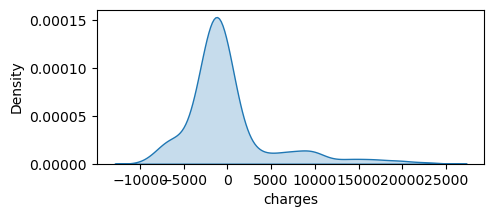

In [78]:
plt.figure(figsize=(5,2))
sns.kdeplot(Residual, fill=True)

In [79]:
mean = Residual.mean()
print("Mean -->",mean)

median = Residual.median()
print("median -->",median)

mode = Residual.mode()[0]
print("Mode -->",mode)

Mean --> 3.684224300402201e-12
median --> -1139.5516868037141
Mode --> -1772.195960207014


### 2.Hypothesis Testing

#### A] Shapiro Test

In [80]:
from scipy.stats import shapiro,kstest,normaltest

In [81]:
_ , p_val = shapiro(Residual)

print("P_Value:",p_val)

if p_val >= 0.05:
    print("Null Hypothesis is Accepted")
    print("Which suggest that Data is Normally Distributed")
    
else:
    print("Null Hypothesis is Rejected which means Alternate Hypothesis is Accepted")
    print("Which suggest that Data is NOT Normally Distributed")

P_Value: 5.320431429879649e-33
Null Hypothesis is Rejected which means Alternate Hypothesis is Accepted
Which suggest that Data is NOT Normally Distributed


### B] kstest

In [82]:
_ , p_val = kstest(Residual, 'norm')

print("P_Value:",p_val)

if p_val >= 0.05:
    print("Null Hypothesis is Accepted")
    print("Which suggest that Data is Normally Distributed")
    
else:
    print("Null Hypothesis is Rejected which means Alternate Hypothesis is Accepted")
    print("Which suggest that Data is NOT Normally Distributed")

P_Value: 0.0
Null Hypothesis is Rejected which means Alternate Hypothesis is Accepted
Which suggest that Data is NOT Normally Distributed


### C] Normal test

In [83]:
_ , p_val = normaltest(Residual)

print("P_Value:",p_val)

if p_val >= 0.05:
    print("Null Hypothesis is Accepted")
    print("Which suggest that Data is Normally Distributed")
    
else:
    print("Null Hypothesis is Rejected which means Alternate Hypothesis is Accepted")
    print("Which suggest that Data is NOT Normally Distributed")

P_Value: 4.4799496416287184e-85
Null Hypothesis is Rejected which means Alternate Hypothesis is Accepted
Which suggest that Data is NOT Normally Distributed


## QQ Plot

In [84]:
import statsmodels.api as sm

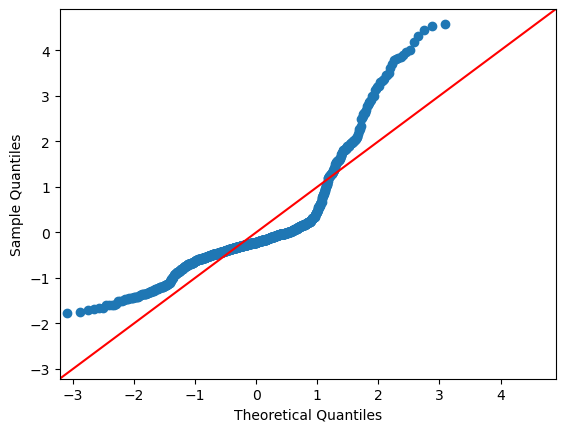

<Figure size 200x200 with 0 Axes>

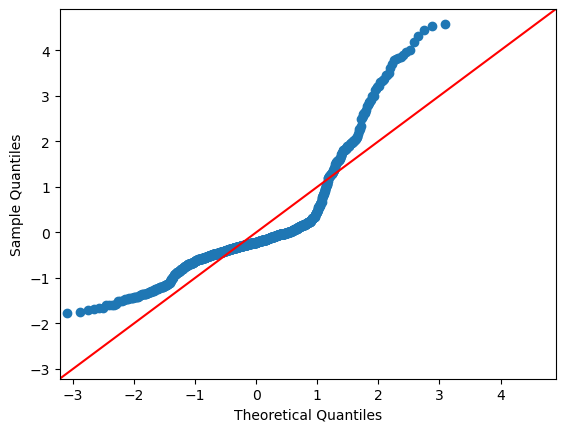

In [85]:
plt.figure(figsize=(2,2))
sm.qqplot(Residual, line = '45', fit=True) 

## Homoscedasticity

<AxesSubplot:xlabel='charges', ylabel='charges'>

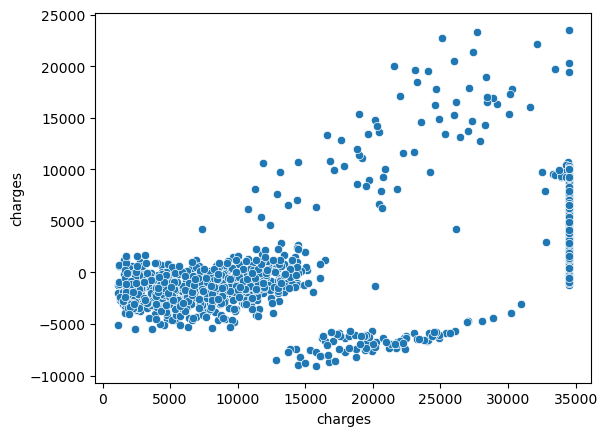

In [86]:
sns.scatterplot(x = y_train, y= Residual)

# Ridge Regression Model

In [87]:
ridge_reg_model = Ridge(alpha= 1.0) # # Here bydefault alpha= 1.0 

In [88]:
ridge_reg_model.fit(x_train, y_train)

Ridge()

## Model evaluation for Training Data

In [89]:
y_pred_train = ridge_reg_model.predict(x_train)

In [90]:
mse = mean_squared_error(y_train, y_pred_train)
print("MSE :",mse)

rmse = np.sqrt(mse)
print("RMSE :",rmse)

mae = mean_absolute_error(y_train, y_pred_train)
print("MAE :",mae)

Training_Ridge_Accuracy_r2 = r2_score(y_train, y_pred_train)
print("Training Ridge Accuracy :", Training_Ridge_Accuracy_r2)

MSE : 26304245.249126796
RMSE : 5128.766445172445
MAE : 3338.864832340349
Training Ridge Accuracy : 0.7506125833958889


## Model evaluation for Testing Data

In [91]:
y_pred_test = ridge_reg_model.predict(x_test)

In [92]:
mse = mean_squared_error(y_test, y_pred_test)
print("MSE :",mse)

rmse = np.sqrt(mse)
print("RMSE :",rmse)

mae = mean_absolute_error(y_test, y_pred_test)
print("MAE :",mae)

Testing_Ridge_Accuracy_r2 = r2_score(y_test, y_pred_test)
print("Testing RidgeAccuracy :", Testing_Ridge_Accuracy_r2)

MSE : 25163250.538349513
RMSE : 5016.298489758112
MAE : 3371.317599926299
Testing RidgeAccuracy : 0.737916057651986


In [93]:
# s2 = pd.Series(ridge_reg_model.coef_, index=x.columns)
# s2.sort_values().plot(kind = "barh")

# Lasso Regression Model

In [94]:
lasso_reg_model = Lasso(alpha= 1.0)   # Here bydefault alpha= 1.0 

In [95]:
lasso_reg_model.fit(x_train, y_train)

Lasso()

## Model evaluation for Training Data

In [96]:
y_pred_train = lasso_reg_model.predict(x_train)

In [97]:
mse = mean_squared_error(y_train, y_pred_train)
print("MSE :",mse)

rmse = np.sqrt(mse)
print("RMSE :",rmse)

mae = mean_absolute_error(y_train, y_pred_train)
print("MAE :",mae)

Training_Lasso_Accuracy_r2 = r2_score(y_train, y_pred_train)
print("Training Lasso Accuracy :", Training_Lasso_Accuracy_r2)

MSE : 26301727.894658104
RMSE : 5128.521024102183
MAE : 3329.088013295462
Training Lasso Accuracy : 0.7506364501338119


## Model evaluation for Testing Data

In [98]:
y_pred_test = lasso_reg_model.predict(x_test)

In [99]:
mse = mean_squared_error(y_test, y_pred_test)
print("MSE :",mse)

rmse = np.sqrt(mse)
print("RMSE :",rmse)

mae = mean_absolute_error(y_test, y_pred_test)
print("MAE :",mae)

Testing_Lasso_Accuracy_r2 = r2_score(y_test, y_pred_test)
print("Testing Lasso Accuracy :", Testing_Lasso_Accuracy_r2)

MSE : 25201102.466003776
RMSE : 5020.069966245866
MAE : 3364.783185814385
Testing Lasso Accuracy : 0.737521816756519


# Hyperparameter Tunning

## Ridge Regression

### 1.GridSearchCv

In [100]:
ridge_model = Ridge() 

param_grid = {"alpha": np.arange(0.01,3,0.01)}  

gscv_ridge_model = GridSearchCV(ridge_model, param_grid, n_jobs=-1)

gscv_ridge_model.fit(x_train, y_train)

GridSearchCV(estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0....
       2.21, 2.22, 2.23, 2.24, 2.25, 2.26, 2.27, 2.28, 2.29, 2.3 , 2.31,
       2.32, 2.33, 2.34, 2.35, 2.36, 2.37, 2.38, 2.39, 2.4 , 2.41, 2.42,
       2.43, 2.44, 2.45, 2.46, 2.47, 2.48, 2.49, 2.5 , 2.51, 2.52, 2.53,
       2.54, 2.55, 2.56, 2.57, 2.58, 2.59, 2.6 , 2.61, 2.62, 2.63, 2.64,
       2.65, 2.66, 2.67, 2.68, 2.69, 2.7 , 2.71, 2.72, 2.73, 2.74, 2.75,
       2.76, 2.77, 2.78, 2.79, 2.8 , 2.81, 2.82, 2.83, 2.84, 2.85, 2.86,
       2.87, 2.88, 2.89, 2.9 , 2.91, 2.92, 2.93, 2.94, 2.95, 2.96, 2.97,
       2.98, 2.99])})

In [101]:
gscv_ridge_model.best_estimator_  # #  Here we get the highest cross-validated score which is 0.6

Ridge(alpha=0.6)

In [102]:
ridge_reg_model = Ridge(alpha= 0.6)
ridge_reg_model.fit(x_train, y_train) # Here we fit the model on traning data

Ridge(alpha=0.6)

### Model evaluation for Training Data

In [103]:
y_pred_train = ridge_reg_model.predict(x_train)

In [104]:
mse = mean_squared_error(y_train, y_pred_train)
print("MSE :",mse)

rmse = np.sqrt(mse)
print("RMSE :",rmse)

mae = mean_absolute_error(y_train, y_pred_train)
print("MAE :",mae)

Training_Ridge_Grid_Accuracy_r2 = r2_score(y_train, y_pred_train)
print("Training Ridge GridSerchCv Accuracy :", Training_Ridge_Grid_Accuracy_r2)

MSE : 26302619.460375283
RMSE : 5128.607945668618
MAE : 3334.7546397340907
Training Ridge GridSerchCv Accuracy : 0.7506279973054248


### Model evaluation for Testing Data

In [105]:
y_pred_test = ridge_reg_model.predict(x_test)

In [106]:
mse = mean_squared_error(y_test, y_pred_test)
print("MSE :",mse)

rmse = np.sqrt(mse)
print("RMSE :",rmse)

mae = mean_absolute_error(y_test, y_pred_test)
print("MAE :",mae)

Testing_Ridge_Grid_Accuracy_r2 = r2_score(y_test, y_pred_test)
print("Testing Ridge GridSearchCv Accuracy :", Testing_Ridge_Grid_Accuracy_r2)

MSE : 25178295.506286956
RMSE : 5017.797874196106
MAE : 3368.6217705088097
Testing Ridge GridSearchCv Accuracy : 0.7377593591164158


## 2.RandomizedSearchCV

In [107]:
ridge_model = Ridge()   # Model instance

param_grid = {"alpha": np.arange(0.01,3,0.01)}

rscv_ridge_model = RandomizedSearchCV(ridge_model, param_grid, n_jobs=-1)

rscv_ridge_model.fit(x_train, y_train)

RandomizedSearchCV(estimator=Ridge(), n_jobs=-1,
                   param_distributions={'alpha': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0....
       2.21, 2.22, 2.23, 2.24, 2.25, 2.26, 2.27, 2.28, 2.29, 2.3 , 2.31,
       2.32, 2.33, 2.34, 2.35, 2.36, 2.37, 2.38, 2.39, 2.4 , 2.41, 2.42,
       2.43, 2.44, 2.45, 2.46, 2.47, 2.48, 2.49, 2.5 , 2.51, 2.52, 2.53,
       2.54, 2.55, 2.56, 2.57, 2.58, 2.59, 2.6 , 2.61, 2.62, 2.63, 2.64,
       2.65, 2.66, 2.67, 2.68, 2.69, 2.7 , 2.71, 2.72, 2.73, 2.74, 2.75,
       2.76, 2.77, 2.78, 2.79, 2.8 , 2.81, 2.82, 2.83, 2.84, 2.85, 2.86,
       2.87, 2.88, 2.89, 2.9 , 2.91, 2.92, 2.93, 2.94, 2.95, 2.96, 2.97,
       2.98, 2.99])})

In [108]:
rscv_ridge_model.best_estimator_ 

Ridge(alpha=0.72)

In [109]:
ridge_reg_model = Ridge(alpha= 0.5)  

ridge_reg_model.fit(x_train, y_train)

Ridge(alpha=0.5)

### Model evaluation for Training Data

In [110]:
y_pred_train = ridge_reg_model.predict(x_train)

In [111]:
mse = mean_squared_error(y_train, y_pred_train)
print("MSE :",mse)

rmse = np.sqrt(mse)
print("RMSE :",rmse)

mae = mean_absolute_error(y_train, y_pred_train)
print("MAE :",mae)

Training_Ridge_Random_Accuracy_r2 = r2_score(y_train, y_pred_train)
print("Training Ridge Random Accuracy :", Training_Ridge_Random_Accuracy_r2)

MSE : 26302338.616603103
RMSE : 5128.580565478434
MAE : 3333.732047328615
Training Ridge Random Accuracy : 0.7506306599517829


### Model evaluation for Testing Data

In [112]:
y_pred_test = ridge_reg_model.predict(x_test)

mse = mean_squared_error(y_test, y_pred_test)
print("MSE :",mse)

rmse = np.sqrt(mse)
print("RMSE :",rmse)

mae = mean_absolute_error(y_test, y_pred_test)
print("MAE :",mae)

Testing_Ridge_Random_Accuracy_r2 = r2_score(y_test, y_pred_test)
print("Testing Ridge Random Accuracy :", Testing_Ridge_Random_Accuracy_r2)

MSE : 25182204.130976025
RMSE : 5018.187335181502
MAE : 3367.9562168633133
Testing Ridge Random Accuracy : 0.7377186494407677


# Lasso Regression

## 1.GridSearchCv

In [113]:
lasso_model = Lasso()

param_grid = {"alpha": np.arange(0.01,3,0.01)}

gscv_lasso_model = GridSearchCV(lasso_model, param_grid, n_jobs=-1)

gscv_lasso_model.fit(x_train, y_train)

GridSearchCV(estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0....
       2.21, 2.22, 2.23, 2.24, 2.25, 2.26, 2.27, 2.28, 2.29, 2.3 , 2.31,
       2.32, 2.33, 2.34, 2.35, 2.36, 2.37, 2.38, 2.39, 2.4 , 2.41, 2.42,
       2.43, 2.44, 2.45, 2.46, 2.47, 2.48, 2.49, 2.5 , 2.51, 2.52, 2.53,
       2.54, 2.55, 2.56, 2.57, 2.58, 2.59, 2.6 , 2.61, 2.62, 2.63, 2.64,
       2.65, 2.66, 2.67, 2.68, 2.69, 2.7 , 2.71, 2.72, 2.73, 2.74, 2.75,
       2.76, 2.77, 2.78, 2.79, 2.8 , 2.81, 2.82, 2.83, 2.84, 2.85, 2.86,
       2.87, 2.88, 2.89, 2.9 , 2.91, 2.92, 2.93, 2.94, 2.95, 2.96, 2.97,
       2.98, 2.99])})

In [114]:
gscv_lasso_model.best_estimator_

Lasso(alpha=2.9899999999999998)

In [115]:
lasso_reg_model = Lasso(alpha= 2.9899999999999998)  
lasso_reg_model.fit(x_train, y_train)

Lasso(alpha=2.9899999999999998)

### Model evaluation for Training Data

In [116]:
y_pred_train = lasso_reg_model.predict(x_train)

mse = mean_squared_error(y_train, y_pred_train)
print("MSE :",mse)

rmse = np.sqrt(mse)
print("RMSE :",rmse)

mae = mean_absolute_error(y_train, y_pred_train)
print("MAE :",mae)

Training_Lasso_Grid_Accuracy_r2 = r2_score(y_train, y_pred_train)
print("Training Lasso Grid Accuracy :", Training_Lasso_Grid_Accuracy_r2)

MSE : 26301967.622896902
RMSE : 5128.544396112497
MAE : 3329.789546921495
Training Lasso Grid Accuracy : 0.7506341772989293


### Model evaluation for Testing Data

In [117]:
y_pred_test = lasso_reg_model.predict(x_test)

mse = mean_squared_error(y_test, y_pred_test)
print("MSE :",mse)

rmse = np.sqrt(mse)
print("RMSE :",rmse)

mae = mean_absolute_error(y_test, y_pred_test)
print("MAE :",mae)

Testing_Lasso_Grid_Accuracy_r2 = r2_score(y_test, y_pred_test)
print("Testing Lasso Grid Accuracy :", Testing_Lasso_Grid_Accuracy_r2)

MSE : 25198218.182554603
RMSE : 5019.782682801578
MAE : 3365.123955055785
Testing Lasso Grid Accuracy : 0.7375518575644844


## 2.RandomizedSearchCV

In [118]:
lasso_model = Lasso()

param_grid = {"alpha": np.arange(0.01,3,0.01)}

rscv_lasso_model = RandomizedSearchCV(lasso_model, param_grid, n_jobs=-1)

rscv_lasso_model.fit(x_train, y_train)

RandomizedSearchCV(estimator=Lasso(), n_jobs=-1,
                   param_distributions={'alpha': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0....
       2.21, 2.22, 2.23, 2.24, 2.25, 2.26, 2.27, 2.28, 2.29, 2.3 , 2.31,
       2.32, 2.33, 2.34, 2.35, 2.36, 2.37, 2.38, 2.39, 2.4 , 2.41, 2.42,
       2.43, 2.44, 2.45, 2.46, 2.47, 2.48, 2.49, 2.5 , 2.51, 2.52, 2.53,
       2.54, 2.55, 2.56, 2.57, 2.58, 2.59, 2.6 , 2.61, 2.62, 2.63, 2.64,
       2.65, 2.66, 2.67, 2.68, 2.69, 2.7 , 2.71, 2.72, 2.73, 2.74, 2.75,
       2.76, 2.77, 2.78, 2.79, 2.8 , 2.81, 2.82, 2.83, 2.84, 2.85, 2.86,
       2.87, 2.88, 2.89, 2.9 , 2.91, 2.92, 2.93, 2.94, 2.95, 2.96, 2.97,
       2.98, 2.99])})

In [119]:
rscv_lasso_model.best_estimator_

Lasso(alpha=2.75)

In [120]:
lasso_reg_model = Lasso(alpha= 2.07)  
lasso_reg_model.fit(x_train, y_train)

Lasso(alpha=2.07)

### Model evaluation for Training Data

In [121]:
y_pred_train = lasso_reg_model.predict(x_train)

mse = mean_squared_error(y_train, y_pred_train)
print("MSE :",mse)

rmse = np.sqrt(mse)
print("RMSE :",rmse)

mae = mean_absolute_error(y_train, y_pred_train)
print("MAE :",mae)

Training_Lasso_Random_Accuracy_r2 = r2_score(y_train, y_pred_train)
print("Training Lasso Random Accuracy :", Training_Lasso_Random_Accuracy_r2)

MSE : 26301827.08171135
RMSE : 5128.53069423508
MAE : 3329.462925104919
Training Lasso Random Accuracy : 0.7506355097531724


### Model evaluation for Testing Data

In [122]:
y_pred_test = lasso_reg_model.predict(x_test)

mse = mean_squared_error(y_test, y_pred_test)
print("MSE :",mse)

rmse = np.sqrt(mse)
print("RMSE :",rmse)

mae = mean_absolute_error(y_test, y_pred_test)
print("MAE :",mae)

Testing_Lasso_Random_Accuracy_r2 = r2_score(y_test, y_pred_test)
print("Testing Lasso Random Accuracy :", Testing_Lasso_Random_Accuracy_r2)

MSE : 25199519.751607165
RMSE : 5019.912325091661
MAE : 3364.9664182018064
Testing Lasso Random Accuracy : 0.7375383012734156


In [123]:
x.head(1)

,age,sex,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest
0,19,1,27.9,0,1,0,0,0,1


In [124]:
column_names = x.columns 
# column_names

In [125]:
# create picke file

import pickle

with open("linear_model_Medical_Insurance.pkl", "wb") as f:
    pickle.dump(model, f)

In [126]:
save_data = {"sex_select":sex_select, 
            "smoker_select":smoker_select,
            "column_names":list(column_names)}
# save_data

In [127]:
import json

with open("Project_Med_ins_data.json", "w") as f:
    json.dump(save_data, f)

# User Input

In [128]:
age = 19.0
sex = 'male'
bmi = 27.9
children = 0.0
smoker = "no"

region = 'southeast'

In [129]:
array = np.zeros(len(x.columns), dtype = int)  
array

array([0, 0, 0, 0, 0, 0, 0, 0, 0])

In [130]:
region_col = 'region_' + region 

region_col_index = np.where(column_names == region_col)[0][0]
region_col_index

7

In [136]:
save_data["sex_select"][sex]
save_data["smoker_select"][smoker]

0

In [132]:
array[0] = age
array[1] = save_data["sex_select"][sex]
array[2] = bmi
array[3] = children
array[4] = save_data["smoker_select"][smoker]

array[region_col_index] = 1

array


array([19,  0, 27,  0,  0,  0,  0,  1,  0])

In [133]:
charges = round(model.predict([array])[0],2)
print("Predicted Medical Insurance Charges would be :",charges,"Rs")

Predicted Medical Insurance Charges would be : 1836.42 Rs
